### 당뇨 데이터로 다양한 회귀 모델 비교하기

In [9]:
# 라이브러리 불러오기
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# 데이터 로드
data = load_diabetes()
X, y = data.data, data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 리스트
models = {
    "Multivariate Regression": LinearRegression(),
    "After Standardized": make_pipeline(StandardScaler(), LinearRegression()),
    "Lasso Regression": Lasso(alpha=0.01),
    "Ridge Regression": Ridge(alpha=0.01),
    "Elastic Regression": ElasticNet(alpha=0.005, l1_ratio=0.05),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
}

# 결과 저장
results = []

# 각 모델에 대해 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results.append((name, train_score, test_score))

# 결과 출력
print("모델 성능 비교 (R² 점수)")
print("모델명\t\t\t훈련 점수\t\t테스트 점수")
for name, train_score, test_score in results:
    print(f"{name}\t\t{train_score:.4f}\t\t{test_score:.4f}")


모델 성능 비교 (R² 점수)
모델명			훈련 점수		테스트 점수
Multivariate Regression		0.5279		0.4526
After Standardized		0.5279		0.4526
Lasso Regression		0.5265		0.4567
Ridge Regression		0.5262		0.4560
Elastic Regression		0.3919		0.3790
Polynomial Regression		0.6062		0.4156


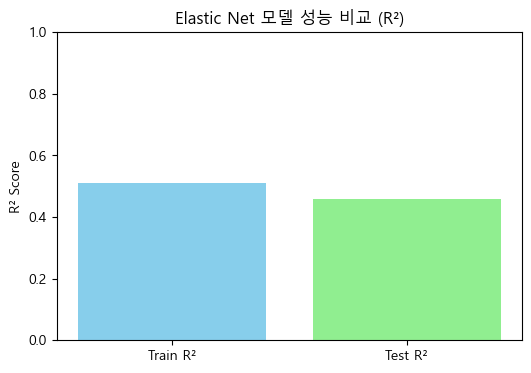

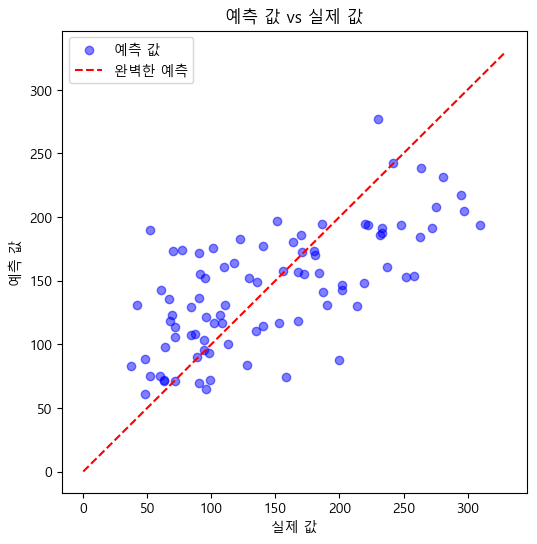

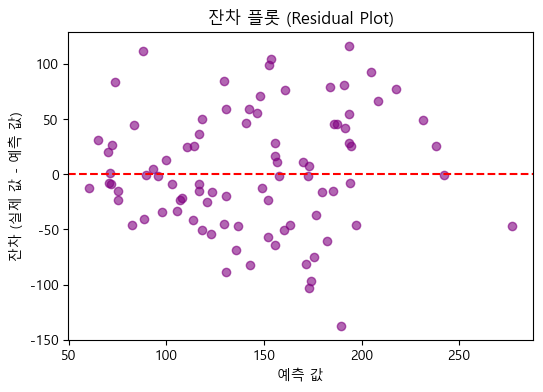

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = load_diabetes()
X, y = data.data, data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net 모델 설정 및 학습
elastic_model = ElasticNet(alpha=0.001, l1_ratio=0.3, random_state=42)
elastic_model.fit(X_train, y_train)

# 예측
y_pred_train = elastic_model.predict(X_train)
y_pred_test = elastic_model.predict(X_test)

# R² 계산
train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)

# 모델 성능 비교 시각화
model_names = ['Train R²', 'Test R²']
scores = [train_score, test_score]

plt.figure(figsize=(6, 4))
plt.bar(model_names, scores, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Elastic Net 모델 성능 비교 (R²)')
plt.ylabel('R² Score')
plt.show()

# 예측 값 vs 실제 값 시각화
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5, label='예측 값')
plt.plot([0, 330], [0, 330], '--', color='red', label='완벽한 예측')
plt.title('예측 값 vs 실제 값')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.legend()
plt.show()

# 잔차 플롯 (Residual Plot)
residuals = y_test - y_pred_test

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('잔차 플롯 (Residual Plot)')
plt.xlabel('예측 값')
plt.ylabel('잔차 (실제 값 - 예측 값)')
plt.show()


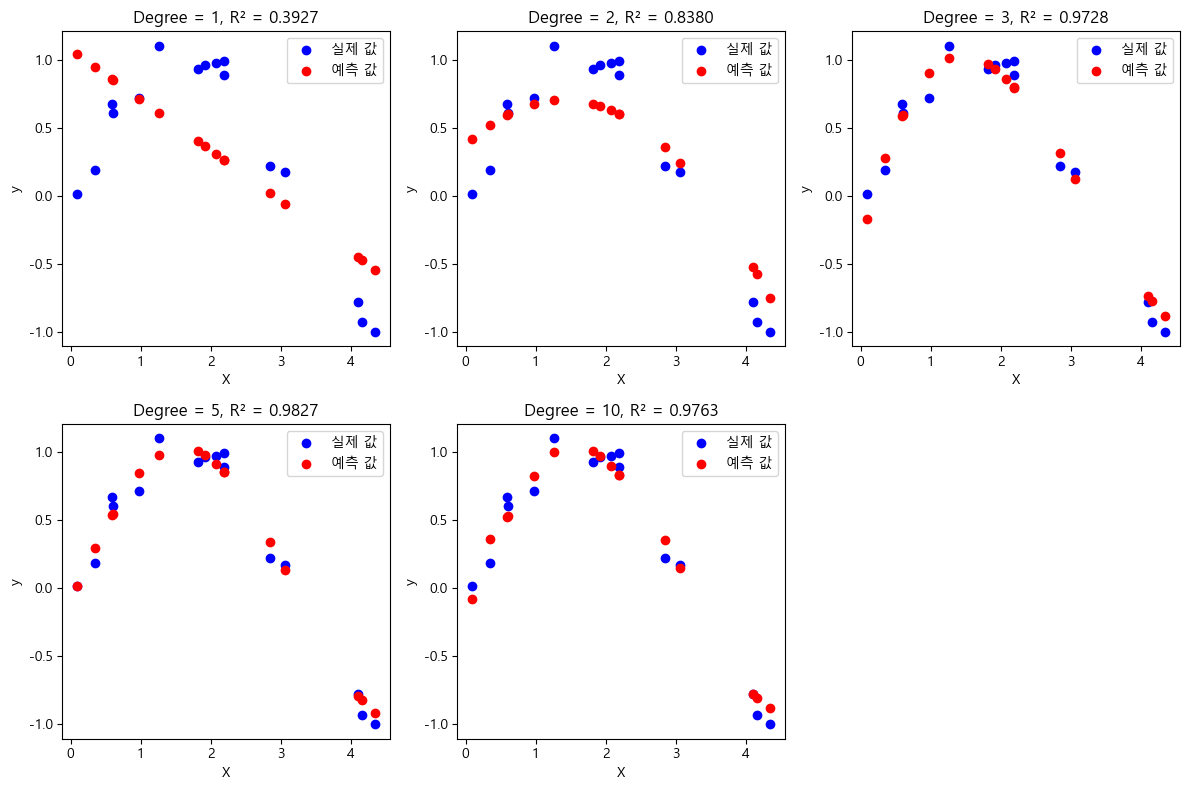

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 생성 (비선형 데이터)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다양한 degree로 실험
degrees = [1, 2, 3, 5, 10]
plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    # 시각화
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test, y_test, color='blue', label='실제 값')
    plt.scatter(X_test, y_pred, color='red', label='예측 값')
    plt.title(f'Degree = {degree}, R² = {score:.4f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


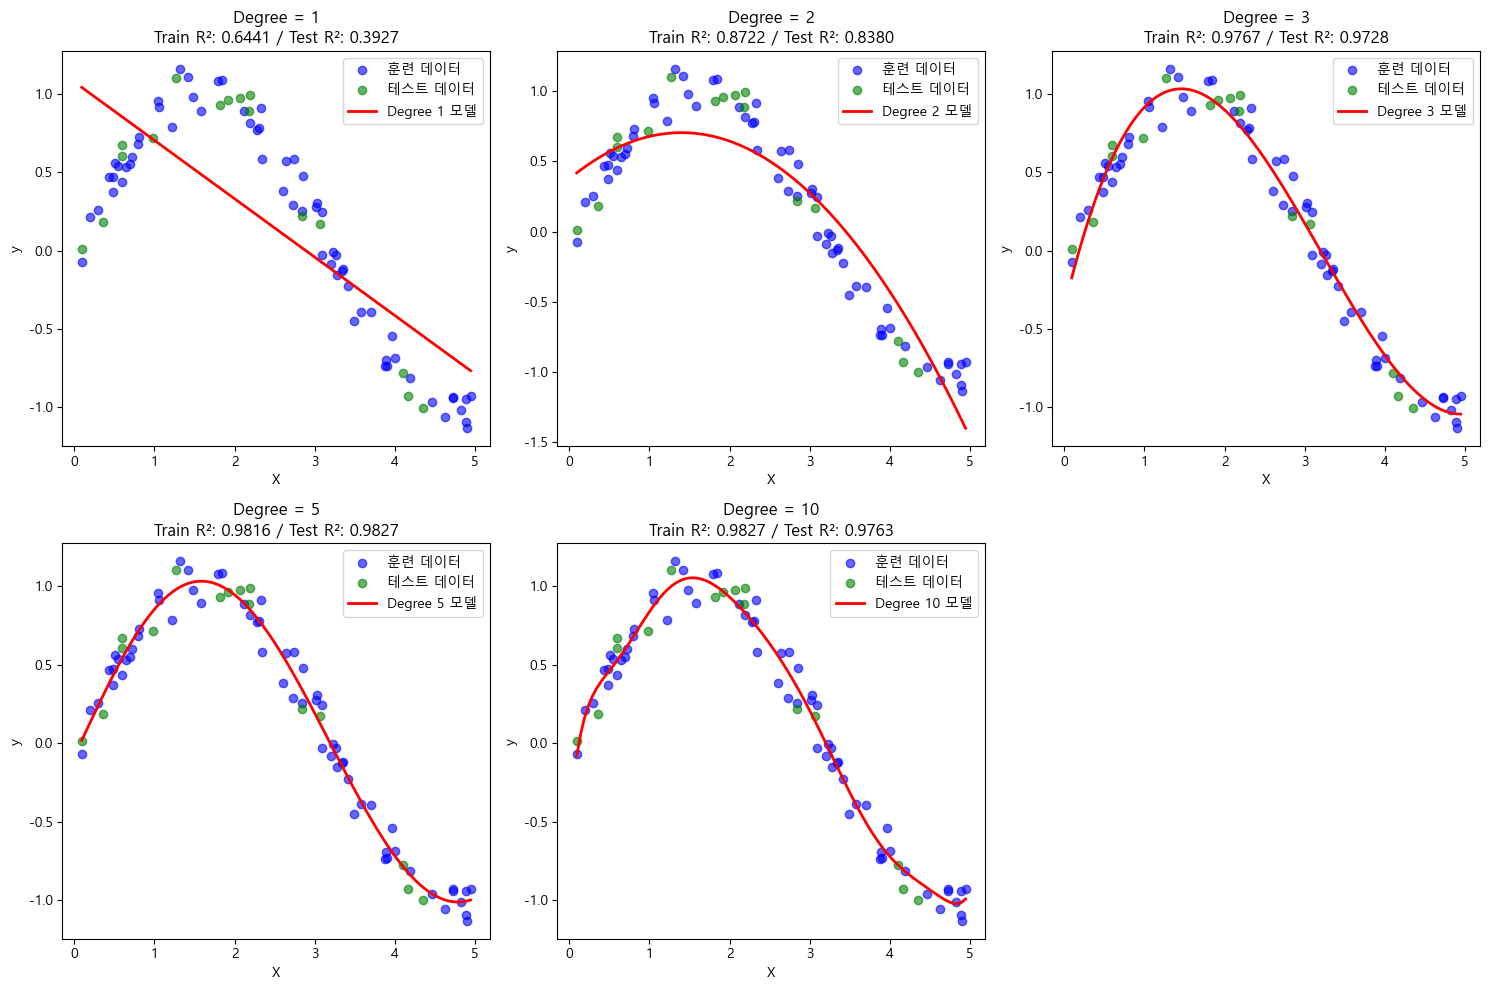

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 데이터 생성 (비선형 데이터)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다양한 degree로 실험
degrees = [1, 2, 3, 5, 10]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # 파이프라인으로 모델 정의
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # R² 점수 계산
    train_score = r2_score(y_train, y_pred_train)
    test_score = r2_score(y_test, y_pred_test)

    # 시각화
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='훈련 데이터', alpha=0.6)
    plt.scatter(X_test, y_test, color='green', label='테스트 데이터', alpha=0.6)

    # X 범위 정렬하여 선형 예측 선 표시
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model.predict(X_range)
    plt.plot(X_range, y_range, color='red', linewidth=2, label=f'Degree {degree} 모델')

    plt.title(f'Degree = {degree}\nTrain R²: {train_score:.4f} / Test R²: {test_score:.4f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()
